#**Credit Card Consumers Churn Rate**

# **Data Gathering**

I used the website "Kaggle" to search for datasets that can be used. I have chosen three datasets that can be potentially used for the project. In the end, we have chosen the Credit Card customers dataset and downloaded the "BankChurners.csv" file and used this csv file as our main dataset.

# **Cleansing Data**

In order to scrub the data I decided to check for NaN values using the code old_bank.isnull().sum().sum() and then I decided to check if there are any missing values using the code old_bank.isna().sum().sum() in order to filter out and have a clean dataset that can be used. I also renamed some of the column heading.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

# importing libraries

In [2]:
old_bank = pd.read_csv(r"..\Group 2 - CS170_BM1\old_bank.csv")

# importing dataset of old_bank

In [3]:
print(old_bank.shape)

# to display number of rows and columns

(10127, 23)


In [4]:
old_bank.isnull().sum().sum()

# to check if there are any NaN values in the dataset

0

In [5]:
old_bank.isna().sum().sum()

# to check if there are any missing values in the dataset

0

In [6]:
old_bank = old_bank.rename(columns = {'Attrition_Flag' : 'Customer_Attrition' , 'Income_Category' : 'Customer_Income', 'Card_Category' : 'Customer_Card_Category' , 'Avg_Open_To_Buy' : 'Total_Credit_used', 'Total_Revolving_Bal' : 'Total_Revolving_Balance', 'Total_Trans_Amt' : 'Total_Transaction_Amount', 'Total_Trans_Ct' : 'Total_Transaction_Count', 'Avg_Utilization_Ratio' : 'Average_Utilization_Ratio', 'Months_Inactive_12_mon' : 'Months_Inactive', 'Contacts_Count_12_mon' : 'Contacts_Count_Month', 'Total_Ct_Chng_Q4_Q1' : 'Total_Count_Change', 'Total_Amt_Chng_Q4_Q1' : 'Total_Amount_Change'})

# to rename some of the column heading

In [7]:
old_bank.head(10)

# to show the first 10 records

,CLIENTNUM,Customer_Attrition,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Customer_Income,Customer_Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Balance,Total_Credit_used,Total_Amount_Change,Total_Transaction_Amount,Total_Transaction_Count,Total_Count_Change,Average_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


# Exploratory Data Analysis

**General Problem Statement:** 
To predict which customers will not be using the amenities 
of the bank in the future.

**Data Science Questions:**
1. Does gender and marital status influence the churn rate of the bank?
2. Is there a correlation between the attrited customers and the number of inactive months?
3. Is there a correlation between the total transaction amount and 
total transaction count?


**Data Inspection:** Upon inspecting the data, we have confirmed that there are two types of data namely, numerical and nominal data. However, we change the data type of Customer_Attrition to Numerical Data because we needed it for the correlation



**Nominal Data:** Gender, Education_Level, Marital_Status, Customer_Income, Customer_Card_Category

**Numerical Data:** Customer_Attrition, CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count, Months_Inactive, Contacts_Count_Month, Credit_Limit, Total_Revolving_Balance, Total_Credit_used, Total_Amount_Change, Total_Transaction_Amount, Total_Transaction_Count, Total_Count_Change, Average_Utiliation_Ratio, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,      
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2







In [8]:
old_bank['Customer_Attrition'].replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

# to change the nominal data "Existing Customer" and "Attrited Customer" to numerical data

In [9]:
old_bank.dtypes

# to inspect the properties of the updated datset

CLIENTNUM                                                                                                                               int64
Customer_Attrition                                                                                                                      int64
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Custom

**Variable Correlation**: To show the correlation of the following variables:
1. Customer_Attrition with Gender
2. Customer Attrition with Marital_Status
3. Customer_Attrition with both Gender and Marital_status
4. Customer_Attrition and Inactive_Months
5. Total_Transaction_Amount and Total_Transaction_Count with Customer_Attrition


In [10]:
old_bank['Customer_Attrition'].value_counts(normalize=True)

# to show the percentage of current existing customer and attrited customers
# there is a 16% churn rate of customers

0    0.83934
1    0.16066
Name: Customer_Attrition, dtype: float64

In [11]:
old_bank[['Customer_Attrition','Gender']].\
groupby(['Gender']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with Gender
# the mean is the churn rate of customers
# the count shows the number of Female and Male customers

Customer_Attrition      
                     mean count
Gender                         
F                    0.17  5358
M                    0.15  4769

In [12]:
old_bank[['Customer_Attrition','Marital_Status']].\
groupby(['Marital_Status']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with Marital_Status
# the mean is the churn rate of customers
# the count shows the number of Divorced, Married, Single, and Unknown customers

Customer_Attrition      
                             mean count
Marital_Status                         
Divorced                     0.16   748
Married                      0.15  4687
Single                       0.17  3943
Unknown                      0.17   749

In [13]:
old_bank[['Customer_Attrition','Gender','Marital_Status']].\
groupby(['Gender','Marital_Status']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with both Gender and Marital_Status
# the mean is the churn rate of customers
# for the Gender F and M, the count shows the number of Divorced, Married, Single, and, Unknown Customers

Customer_Attrition      
                                    mean count
Gender Marital_Status                         
F      Divorced                     0.17   402
       Married                      0.17  2451
       Single                       0.18  2125
       Unknown                      0.18   380
M      Divorced                     0.15   346
       Married                      0.13  2236
       Single                       0.16  1818
       Unknown                      0.16   369

In [14]:
old_bank[['Customer_Attrition','Months_Inactive']].\
groupby(['Months_Inactive']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with Months_Inactive
# the mean is the churn rate of customers
# the count shows the number of customers that have been inactive based on the number of Months_Inactive 

Customer_Attrition      
                              mean count
Months_Inactive                         
0                             0.52    29
1                             0.04  2233
2                             0.15  3282
3                             0.21  3846
4                             0.30   435
5                             0.18   178
6                             0.15   124

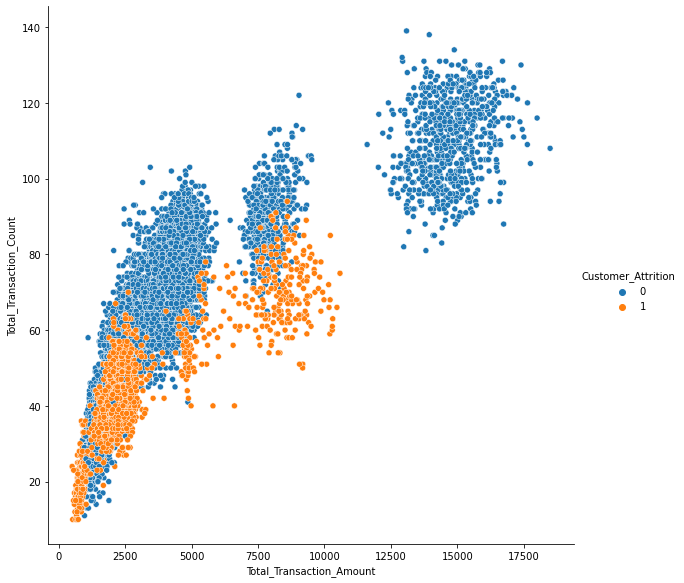

In [15]:
sns.relplot(data=old_bank, kind='scatter', x='Total_Transaction_Amount', y='Total_Transaction_Count', hue='Customer_Attrition', height=8)

# to show the correlation between Total_Transaction_Amount and Total_Transaction_Count while using the Customer_Attrition as basis
# the '0' is the existing customer
# the '1' is the attrited customer

**Feature Extraction**: We filtered the dataset using correlation matrix by using Pearson correlation which is under the Filter Method. We can see the correlation of different variables with each other by plotting using the Pearson correlation heatmap



<AxesSubplot:>

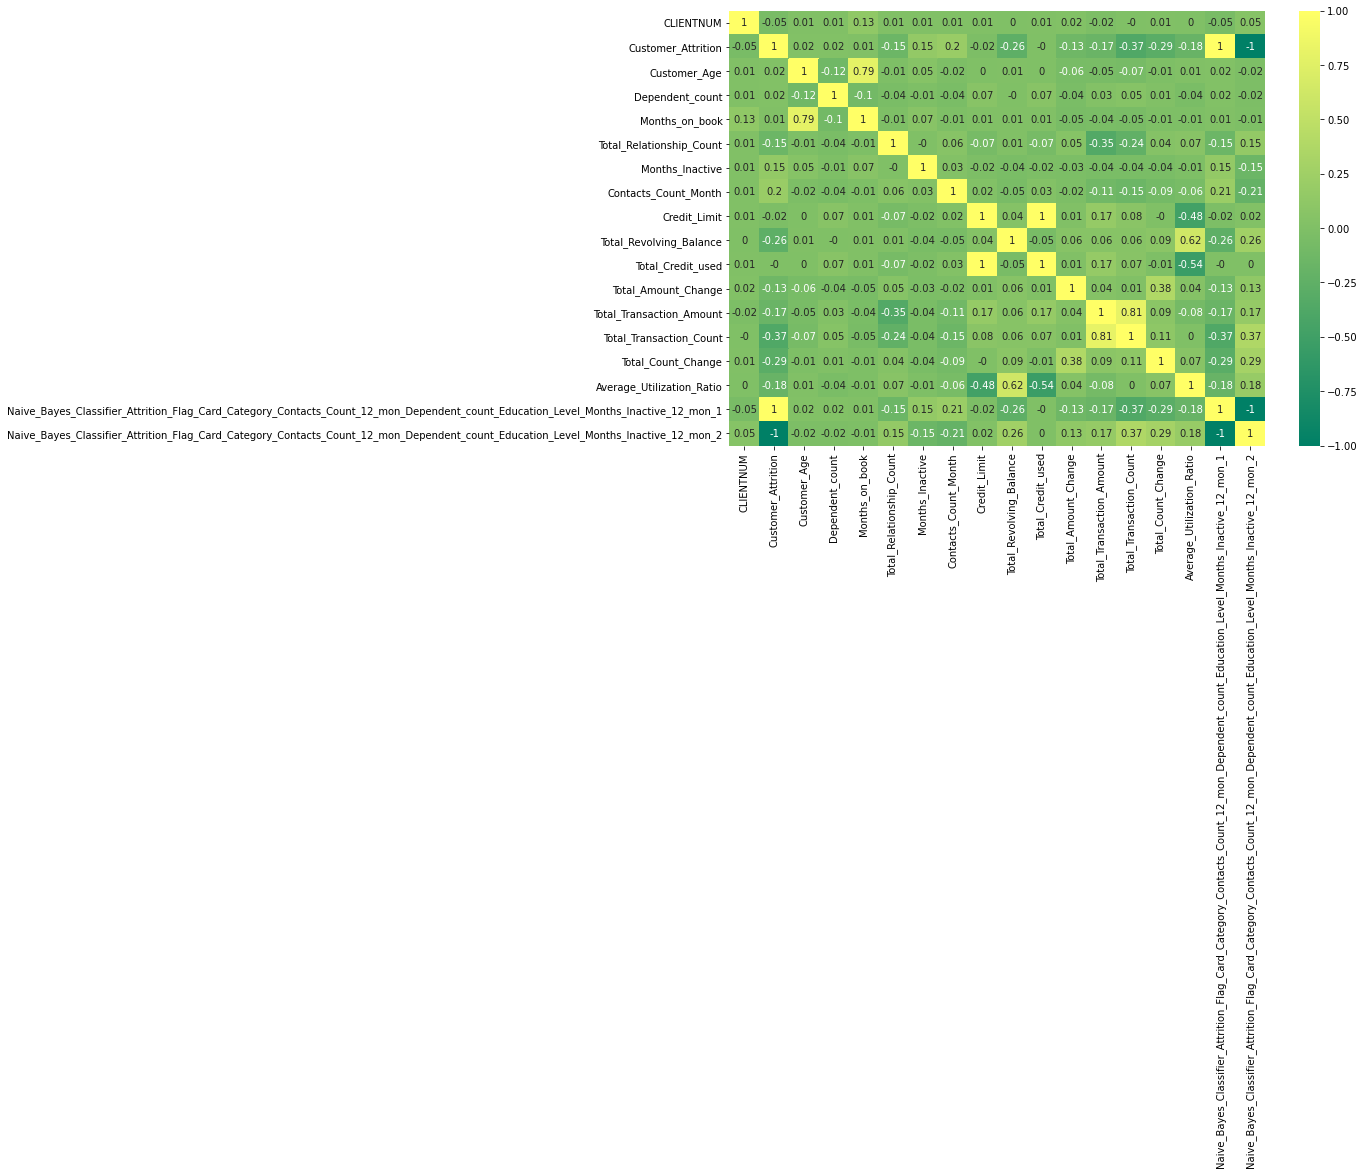

In [16]:
hmap = old_bank.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(hmap, annot=True, cmap="summer")

# to display the correlations of the variables with other variables
# the 1st row is highly needed because it shows the correlation of Customer_Attrition with other variables
# the closer to the value of 1, the stronger the positive correlation
# the closer to the value of -1, the stronger the negative correlation
# the closer to the value of 0, the weaker the correlation or if 0, there is no correlation

In [17]:
hmap_target = abs(hmap['Customer_Attrition']).sort_values(ascending=False)
hmap_target

# to show the correlation of Customer_Attrition with the other variables
# all the values have been changed to absolute value because all of the correlations, may it be positive or negative, is highly needed

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2    1.00
Customer_Attrition                                                                                                                    1.00
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    1.00
Total_Transaction_Count                                                                                                               0.37
Total_Count_Change                                                                                                                    0.29
Total_Revolving_Balance                                                                                                               0.26
Contacts_Count_Month                                                                                                                  0.20
Average_Utilization_Ratio  

**Data Visualization**: We wanted to show the data in forms of simple charts such as bar charts and scatter plot chart to get a better understanding of the data

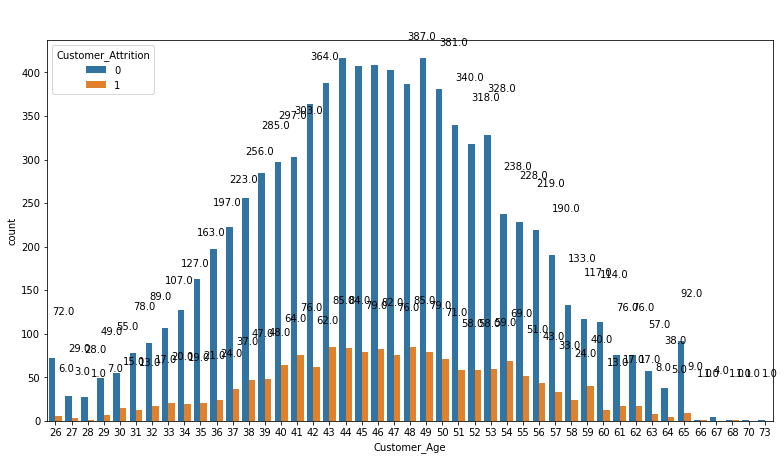

In [18]:
plt.figure(figsize=(13,7))
plot=sns.countplot(x=old_bank.Customer_Age,hue=old_bank.Customer_Attrition)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
#plt.xticks(rotation=90)
plt.show()

# to show the count of Customer_Attrition in the Customer_Age: 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73
# wherein '0' is the existing customer and '1' is the attrited customer

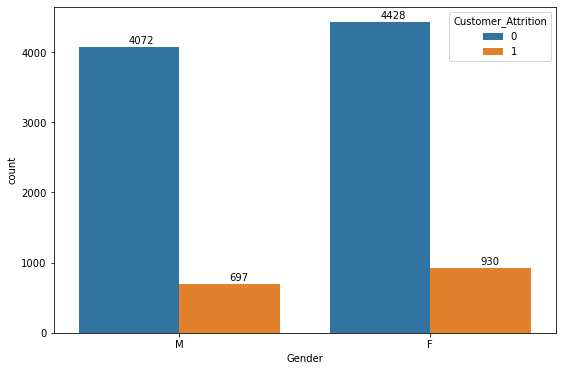

In [19]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=old_bank.Gender,hue=old_bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrition in the Gender: M and F 
# wherein '0' is the existing customer and '1' is the attrited customer

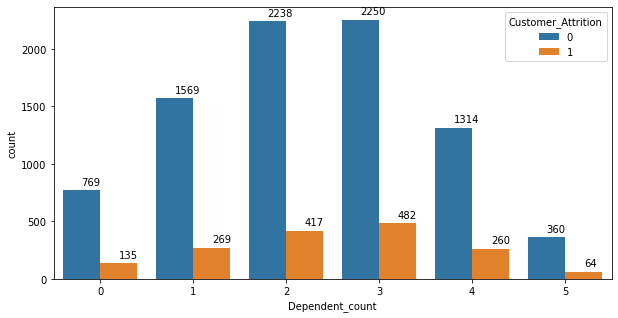

In [20]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=old_bank.Dependent_count,hue=old_bank.Customer_Attrition)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrition in the Dependent_count: 0, 1, 2, 3, 4, 5
# wherein '0' is the existing customer and '1' is the attrited customer

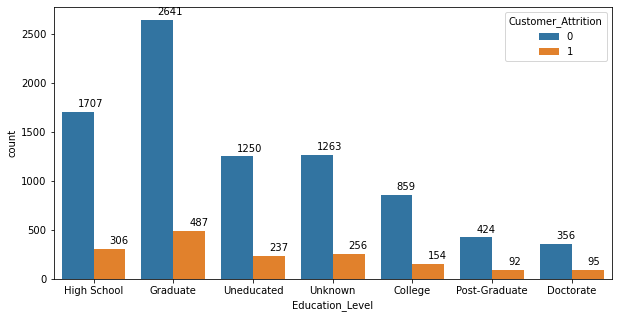

In [21]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=old_bank.Education_Level,hue=old_bank.Customer_Attrition)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))#plt.xticks(rotation=90)
plt.show()

# to show the count of Customer_Attrion in the Education_Level: High School, Graduate, Uneducated, Unknown, College, Post-Graduate, Doctorate
# wherein '0' is the existing customer and '1' is the attrited customer

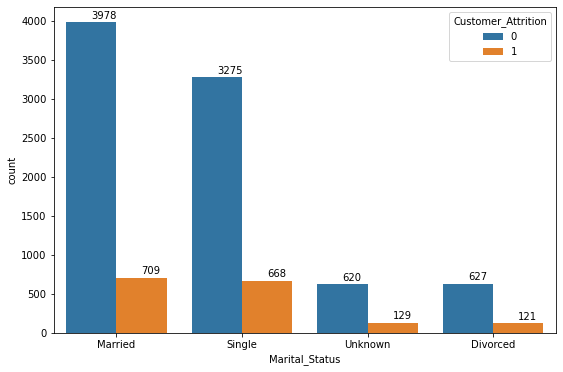

In [22]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=old_bank.Marital_Status,hue=old_bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Marital_Status: Married, Single, Unknown, and Divorced
# wherein '0' is the existing customer and '1' is the attrited customer

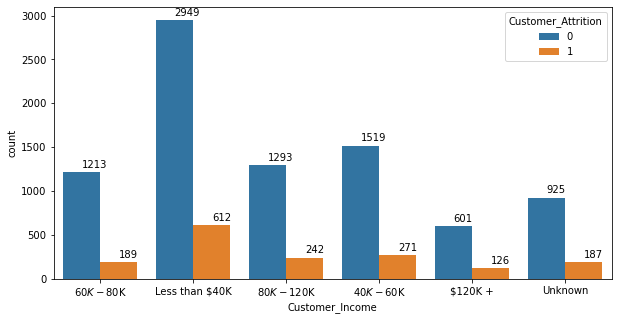

In [23]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=old_bank.Customer_Income,hue=old_bank.Customer_Attrition)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Customer_Income: 60k-80k, Less than $40k, 80k-120k, 40k-60k, $120K +, Unknown
# wherein '0' is the existing customer and '1' is the attrited customer

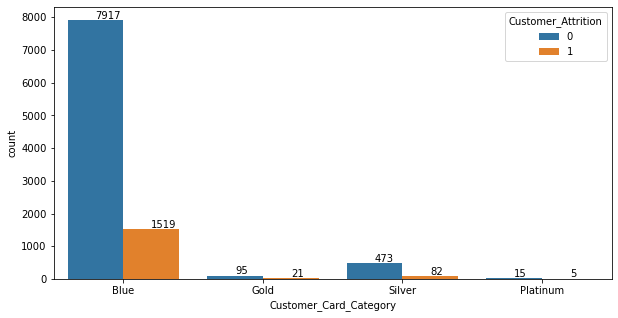

In [24]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=old_bank.Customer_Card_Category,hue=old_bank.Customer_Attrition)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Customer_Card_Category: Blue, Gold, Silver, Platinum
# wherein '0' is the existing customer and '1' is the attrited customer

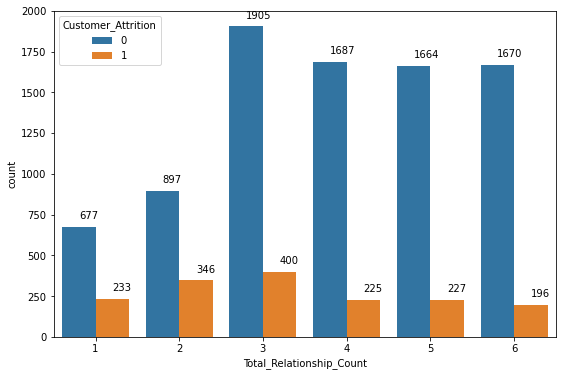

In [25]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=old_bank.Total_Relationship_Count,hue=old_bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Total_Relationshop_Count: 1, 2, 3, 4, 5, 6
# wherein '0' is the existing customer and '1' is the attrited customer

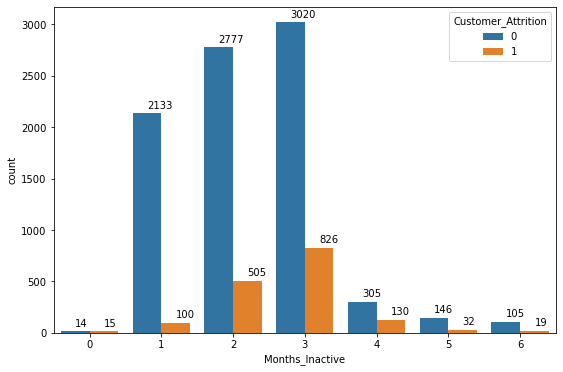

In [26]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=old_bank.Months_Inactive,hue=old_bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Months_Inactive: 0, 1, 2, 3, 4, 5, 6
# wherein '0' is the existing customer and '1' is the attrited customer

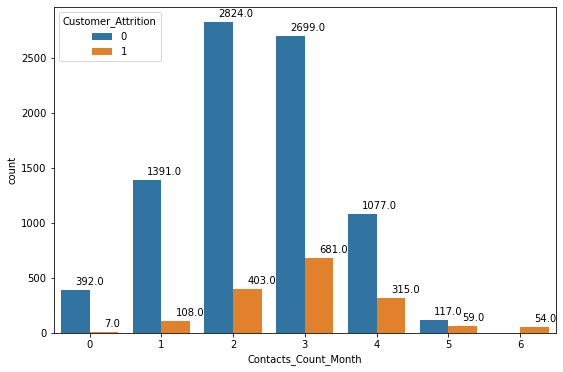

In [27]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=old_bank.Contacts_Count_Month,hue=old_bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Contacts_Count_Month: 0, 1, 2, 3, 4, 5, 6
# wherein '0' is the existing customer and '1' is the attrited customer

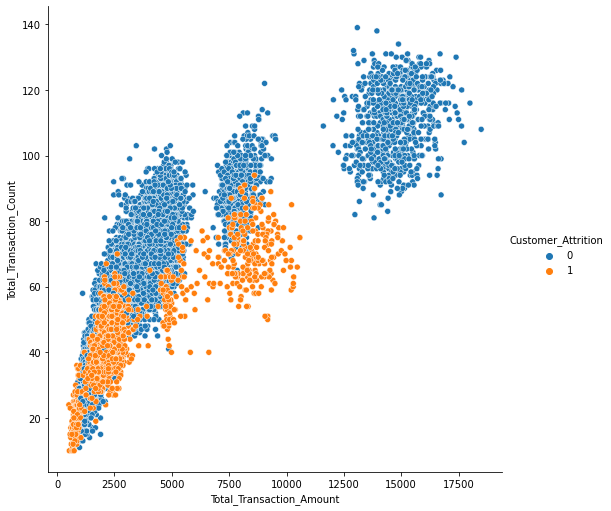

In [28]:
sns.relplot(data=old_bank, kind='scatter', x='Total_Transaction_Amount', y='Total_Transaction_Count',hue='Customer_Attrition', height=7)

# to show the count and compare the Total_Transaction_Amount with the Total_Transaction_Count with the help of Customer_Attrition as basis
# wherein '0' is the existing customer and '1' is the attrited customer

# Modelling

**Features**:
The columns that I have selected are the following: Customer_Attrition, Gender, Marital_Status, Months_Inactive, Total_Transaction_Amount, and Total_Transaction_Acount. I only selected this columns because they will help me answer my data science questions.



In [29]:
bank = pd.read_csv(r"..\Group 2 - CS170_BM1\bank.csv")

# importing libraries and datasets

In [30]:
print(bank.shape)

# to display number of rows and columns

(10127, 6)


In [31]:
bank.isna().sum().sum()

# to check if there are any missing values in the dataset

0

In [32]:
bank.isnull().sum().sum()

# to check if there are any missing values in the dataset

0

In [33]:
bank.head(10)

# to show the first 10 records

,Customer_Attrition,Gender,Marital_Status,Months_Inactive,Total_Transaction_Amount,Total_Transaction_Count
0,Existing Customer,M,Married,1,1144,42
1,Existing Customer,F,Single,1,1291,33
2,Existing Customer,M,Married,1,1887,20
3,Existing Customer,F,Unknown,4,1171,20
4,Existing Customer,M,Married,1,816,28
5,Existing Customer,M,Married,1,1088,24
6,Existing Customer,M,Married,1,1330,31
7,Existing Customer,M,Unknown,2,1538,36
8,Existing Customer,M,Single,2,1350,24
9,Existing Customer,M,Single,3,1441,32


**Train and Test the Model**:

In [34]:
bank['Customer_Attrition'].replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

# to change the nominal data "Existing Customer" and "Attrited Customer" to numerical data

In [35]:
bank.dtypes

# to show the properties of the dataset

Customer_Attrition           int64
Gender                      object
Marital_Status              object
Months_Inactive              int64
Total_Transaction_Amount     int64
Total_Transaction_Count      int64
dtype: object

In [36]:
Total_Transaction_Amount = bank.iloc[:,4].values.reshape(-1,1)
# to gather all the rows of the 4th column which is the Total_Transaction_Amount with a value.reshape making it only compressed to one column


Total_Transaction_Count = bank.iloc[:,5].values
# to gather all the rows in the 5th column which is the Total_Transaction_Count
# to assign Total_Transaction_Amount and Total_Transaction_Count to the specified variables for testing data


In [37]:
from sklearn.model_selection import train_test_split
# to import libraries

unit_train, unit_test, gross_train, gross_test = train_test_split(Total_Transaction_Amount, Total_Transaction_Count, test_size = 1/3, random_state = 0)
# to split the dataset into a train and test set

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(unit_train, gross_train)
# to train the simple linear regression model on the train set

LinearRegression()

Text(0, 0.5, 'Total_Transaction_Count')

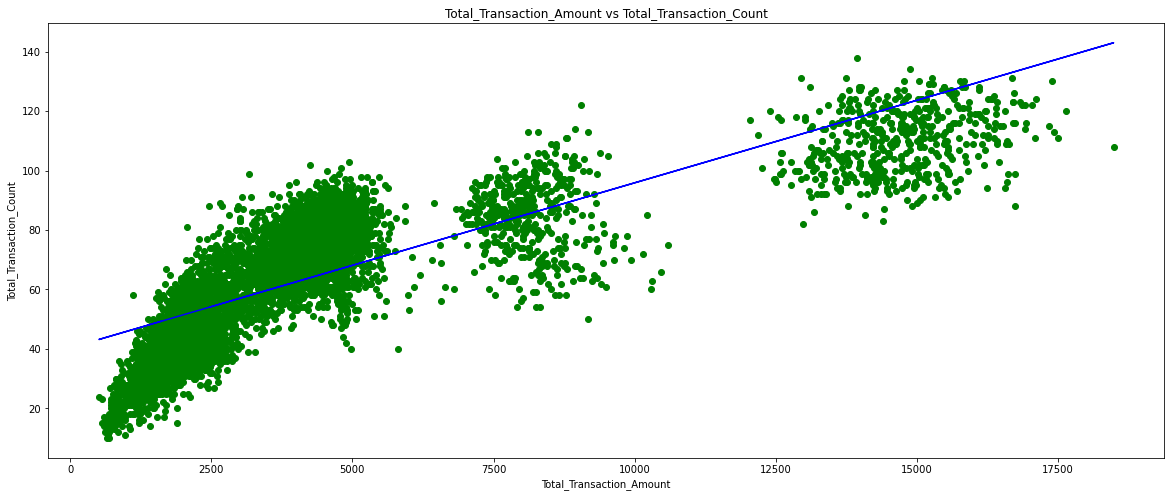

In [39]:
plt.figure(figsize=(20,8))
plt.scatter(unit_train, gross_train, color = 'green')
plt.plot(unit_train, regressor.predict(unit_train), color = 'blue')
plt.title('Total_Transaction_Amount vs Total_Transaction_Count')
plt.xlabel('Total_Transaction_Amount')
plt.ylabel('Total_Transaction_Count')

# to show the correlation of Total_Transaction_Amount with Total_Transaction_Count

**Libraries Needed**
1. import pandas as pd
2. import numpy as np
3. import seaborn as sns
4. import matplotlib.pyplot as plt
5. import io
6. from sklearn.model_selection import train_test_split
7. from sklearn.linear_model import LinearRegression
8. import statsmodels.tools.tools as stattools
9. from sklearn.tree import DecisionTreeClassifier

**Validation and Evaluation Measurement**

In [40]:
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier

# importing libraries

In [41]:
y = bank['Customer_Attrition']
X = bank[['Total_Transaction_Amount', 'Total_Transaction_Count']]

# to specify the names of the combined matrix and the target variable

In [42]:
c50_01 = DecisionTreeClassifier(criterion="entropy", min_samples_split=75, max_leaf_nodes=5).fit(X,y)

# to identify the best split in the data

In [43]:
c50_01_predict = c50_01.predict(bank[['Total_Transaction_Amount', 'Total_Transaction_Count']])

# to obtain classifications

In [44]:
bar = pd.crosstab(bank['Customer_Attrition'], c50_01_predict)
bar

# to show the different data in Customer_Attrition

col_0,0,1
Customer_Attrition,,
0,7731,769
1,548,1079


In [45]:
def model_eval(matrix,model_name):  
	    tn = matrix.iloc[0,0]  
	    tp = matrix.iloc[1,1]  
	    fn = matrix.iloc[1,0]  
	    fp = matrix.iloc[0,1]  
	    tap = fn+tp  
	    tan = tn+fp  
	    tpn = tn+fn  
	    tpp = fp+tp  
	    precision = tp/tpp  
	    recall = tp/tap  
	    total = tn+tp+fn+fp  
	    data = [  
	            round((tp+tn)/total,4),  
	            round(1-((tp+tn)/total),4),  
	            round(tp/tap,4),  
	            round(tn/tan,4),  
	            round(precision,4),  
	            round(2 * (precision * recall) / (precision + recall),4),  
	            round(5 * (precision * recall) / ((4 * precision) + recall),4),  
	            round(1.25 * (precision * recall) / ((.25 * precision) + recall),4),  
	            ]  
	    return(  
	            pd.DataFrame(data, columns=[model_name],   
	                         index=['Accuracy','Error Rate','Sensitivity','Specificity','Precision','F1','F2','F0.5'])  
	            )  
	      
model_bank = model_eval(bar, model_name = 'model_bank')

# to compute for the evaluation measure

In [46]:
model_bank

# to show the evaluation measure

,model_bank
Accuracy,0.8700
Error Rate,0.1300
Sensitivity,0.6632
Specificity,0.9095
Precision,0.5839
F1,0.6210
F2,0.6456
F0.5,0.5982


# Evaluation (Interpreting Results)

Text(0, 0.5, 'Total_Transaction_Count')

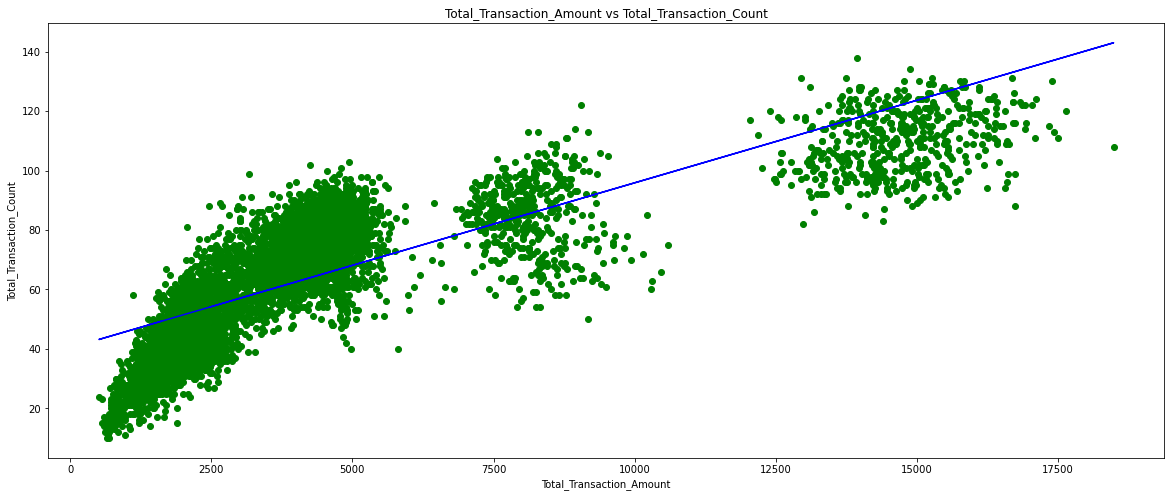

In [47]:
plt.figure(figsize=(20,8))
plt.scatter(unit_train, gross_train, color = 'green')
plt.plot(unit_train, regressor.predict(unit_train), color = 'blue')
plt.title('Total_Transaction_Amount vs Total_Transaction_Count')
plt.xlabel('Total_Transaction_Amount')
plt.ylabel('Total_Transaction_Count')

# to show the correlation of Total_Transaction_Amount with Total_Transaction_Count

I have discovered that  the Total_Transaction_Amount and the Total_Transaction_Count is highly correlated with each other. As the Total_Transaction_Amount goes up the Total_Transaction_Count also goes up. 

In [48]:
model_bank

# to show the evaluation measure

,model_bank
Accuracy,0.8700
Error Rate,0.1300
Sensitivity,0.6632
Specificity,0.9095
Precision,0.5839
F1,0.6210
F2,0.6456
F0.5,0.5982


**Results of the Evaluation Measurement**
To calibrate the accuracy of model_bank, the all negative model was used as a baseline. The following information was then interpreted
1. The model has an Accuracy of 87.00%
2. The model has an Error rate of 13.00%
3. A Specificity of 0.9095 means the model correctly classifies 90.95% of the actual negative records as negative. 
4. A Sensitivity of 0.6632 means that 66.32% of the actual positive records were classified as positive.
5. A Precision of 0.5839 means that 58.39% of the data would respond positively
6. F1 has a value of 0.6210, F2 has a value of 0.6456 which is close to Sensitivity, F0.5 has a value of 0.5982 which is close to the precision.
7. The Fscore are compared directly to choose the best model outcome

**Useful Findings** 


**General Problem Explanation**: In order to solve the general problem statement, we decided to create and answer 3 data science questions that would prove our findings. We used different graphs and correlations of variables to predict which customers will not be using the amenities of the bank in the future. 


**First Data Science Question**: Does gender and marital status influence the churn rate of the bank?

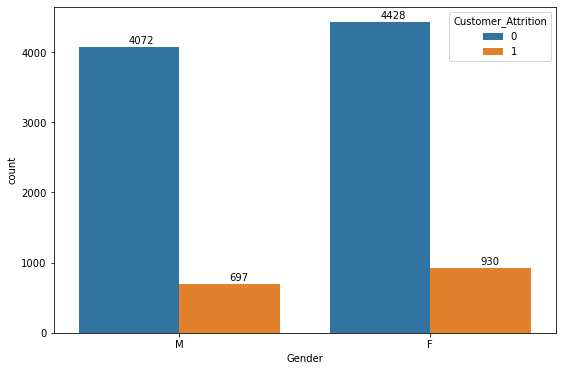

In [49]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=bank.Gender,hue=bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrition in the Gender: M and F 
# wherein '0' is the existing customer and '1' is the attrited customer

In [50]:
bank[['Customer_Attrition','Gender']].\
groupby(['Gender']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with Gender
# the mean is the churn rate of customers
# the count shows the number of Female and Male customers

Customer_Attrition      
                     mean count
Gender                         
F                    0.17  5358
M                    0.15  4769

The female customers have a 17% churn rate. The male customers have a 15% churn rate.

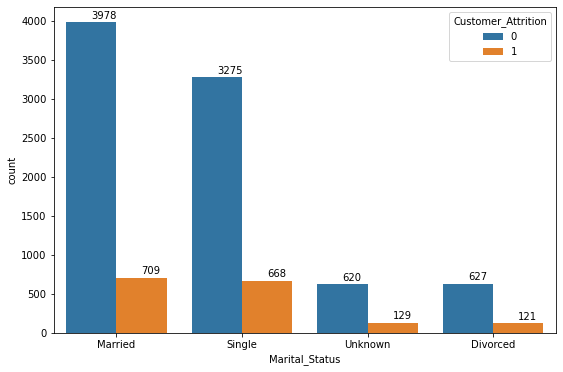

In [51]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=bank.Marital_Status,hue=bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Marital_Status: Married, Single, Unknown, and Divorced
# wherein '0' is the existing customer and '1' is the attrited customer

In [52]:
bank[['Customer_Attrition','Marital_Status']].\
groupby(['Marital_Status']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with Marital_Status
# the mean is the churn rate of customers
# the count shows the number of Divorced, Married, Single, and Unknown customers

Customer_Attrition      
                             mean count
Marital_Status                         
Divorced                     0.16   748
Married                      0.15  4687
Single                       0.17  3943
Unknown                      0.17   749

The divorced customers have a 16% churn rate. The married customers have a 15% churn rate. The single customers have a 17% churn rate. The unknown customers have a 17% churn rate. 

In [53]:
bank[['Customer_Attrition','Gender','Marital_Status']].\
groupby(['Gender','Marital_Status']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with both Gender and Marital_Status
# the mean is the churn rate of customers
# for the Gender F and M, the count shows the number of Divorced, Married, Single, and, Unknown Customers

Customer_Attrition      
                                    mean count
Gender Marital_Status                         
F      Divorced                     0.17   402
       Married                      0.17  2451
       Single                       0.18  2125
       Unknown                      0.18   380
M      Divorced                     0.15   346
       Married                      0.13  2236
       Single                       0.16  1818
       Unknown                      0.16   369

**First Data Science Question Answer**: The female customers have a much higher churn rate than the male customers. Which means that the female customers are more likely to churn than the male customers. An example of a scenario could be that a bank should better improve its amenities to avoid having a high churn rate of its customers.


**Second Data Science Question**: Is there a correlation between the attrited customers and the number 
of inactive months?

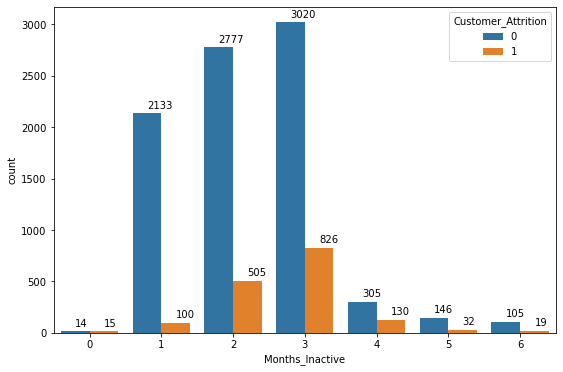

In [54]:
plt.figure(figsize=(9,6))
plot=sns.countplot(x=old_bank.Months_Inactive,hue=old_bank.Customer_Attrition)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()

# to show the count of Customer_Attrion in the Months_Inactive: 0, 1, 2, 3, 4, 5, 6
# wherein '0' is the existing customer and '1' is the attrited customer

In [55]:
old_bank[['Customer_Attrition','Months_Inactive']].\
groupby(['Months_Inactive']).agg(['mean','count']).round(2)

# to show the correlation of Customer_Attrition with Months_Inactive
# the mean is the churn rate of customers
# the count shows the number of customers that have been inactive based on the number of Months_Inactive 

Customer_Attrition      
                              mean count
Months_Inactive                         
0                             0.52    29
1                             0.04  2233
2                             0.15  3282
3                             0.21  3846
4                             0.30   435
5                             0.18   178
6                             0.15   124

**Second Data Science Question Answer**: There is a correlation betwen the attrited customers and the number of inactive months because the churn rate of the customers increases as the number of inactive months increases, excluding the months when there were only a few customers. An example of a scenario could be that the bank kasi anticipate the churn rate of customers depending on the months they are inactive and they could prevent some of the churn rate of the customers.

**Third Data Science Question**: Is there a correlation between the total transaction amount and 
total transaction count?

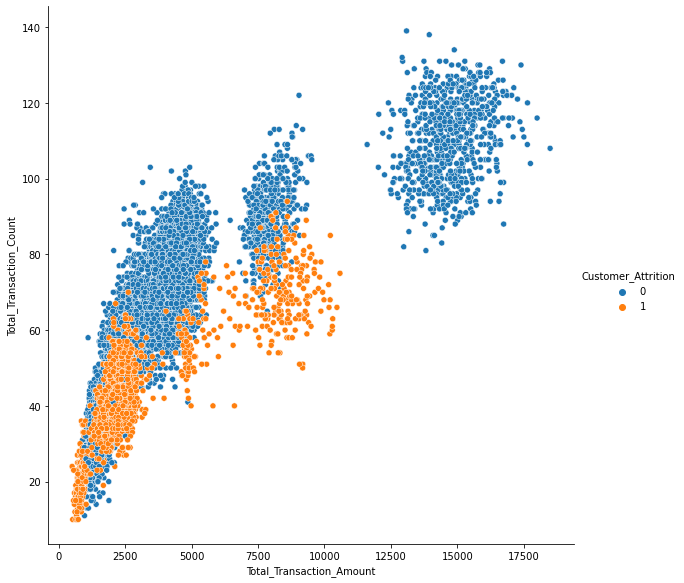

In [56]:
sns.relplot(data=old_bank, kind='scatter', x='Total_Transaction_Amount', y='Total_Transaction_Count', hue='Customer_Attrition', height=8)

# to show the correlation between Total_Transaction_Amount and Total_Transaction_Count while using the Customer_Attrition as basis
# the '0' is the existing customer
# the '1' is the attrited customer

**Third Data Science Question Answer**: There is a correlation between the total transaction amount and the total transaction count because as seen from the scatter plot, there is almost no churn for the customers that have done atleast 90 total transactions. An example of a scenario could be that the bank can predict that if a customer have done more than 90 transactions, that customer will keep using the amenities of the bank and will not churn.

**Final learnings**

I have learned how to use some of the common functions and techniques of the data science exploratory data analaysis. I now have a subtle understanding of how to approach this types of dataset. 

**Recommendations**

I recommend to the future users of this dataset to correlate the variables that have not been used yet to get a better understanding of the correlation between variables and if they will affect the churn rate of the customers.

**References**

https://towardsdatascience.com/practical-data-analysis-with-pandas-and-seaborn-8fec3cb9cd16

https://www.kaggle.com/amanpatyal/exploratory-analysis-bankchurners-csv

https://www.youtube.com/watch?v=LlGLh7H6lFk&ab_channel=JPTomas

https://www.youtube.com/watch?v=eSA3v5wmRJo&ab_channel=JPTomas

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/